**we will use SVM(support vector Machines) to build and train the model using Universal Bank records, and classify the customer is eligible to take credict card or not.**

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/UniversalBank.csv.crdownload')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0.0,0.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0.0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0.0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0.0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0.0,1.0


In [3]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                1
CreditCard            1
dtype: int64

 **Since we have two missing values in Online and CreditCard so we will try to fill the missing values with fillna method and we will fill the columns by median value.**

In [4]:
median = df['Online'].median()
df['Online'].fillna(median,inplace = True)

In [5]:
median = df['CreditCard'].median()
df['CreditCard'].fillna(median,inplace = True)

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1406 non-null   int64  
 1   Age                 1406 non-null   int64  
 2   Experience          1406 non-null   int64  
 3   Income              1406 non-null   int64  
 4   ZIP Code            1406 non-null   int64  
 5   Family              1406 non-null   int64  
 6   CCAvg               1406 non-null   float64
 7   Education           1406 non-null   int64  
 8   Mortgage            1406 non-null   int64  
 9   Personal Loan       1406 non-null   int64  
 10  Securities Account  1406 non-null   int64  
 11  CD Account          1406 non-null   int64  
 12  Online              1406 non-null   float64
 13  CreditCard          1406 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 153.9 KB


In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,703.500000,45.197013,19.968706,74.054765,93099.078947,2.441679,1.992084,1.863442,56.183499,0.101707,0.108108,0.060455,0.602418,0.287340
std,406.021551,11.590167,11.610911,45.643792,2826.507423,1.167995,1.794339,0.834224,100.707047,0.302370,0.310627,0.238413,0.489572,0.452683
min,1.000000,23.000000,-2.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,352.250000,35.000000,10.000000,39.000000,92008.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,703.500000,45.000000,20.000000,64.000000,93305.000000,2.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1054.750000,55.000000,30.000000,98.000000,94608.000000,4.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1406.000000,67.000000,42.000000,205.000000,96651.000000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#remove unwanted columns
dff = df.drop(["ID","ZIP Code"],axis = 1)

In [11]:
dff.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0.0,0.0
1,45,19,34,3,1.5,1,0,0,1,0,0.0,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0.0,0.0
3,35,9,100,1,2.7,2,0,0,0,0,0.0,0.0
4,35,8,45,4,1.0,2,0,0,0,0,0.0,1.0


<Axes: title={'center': 'showing Correlation between all the features'}>

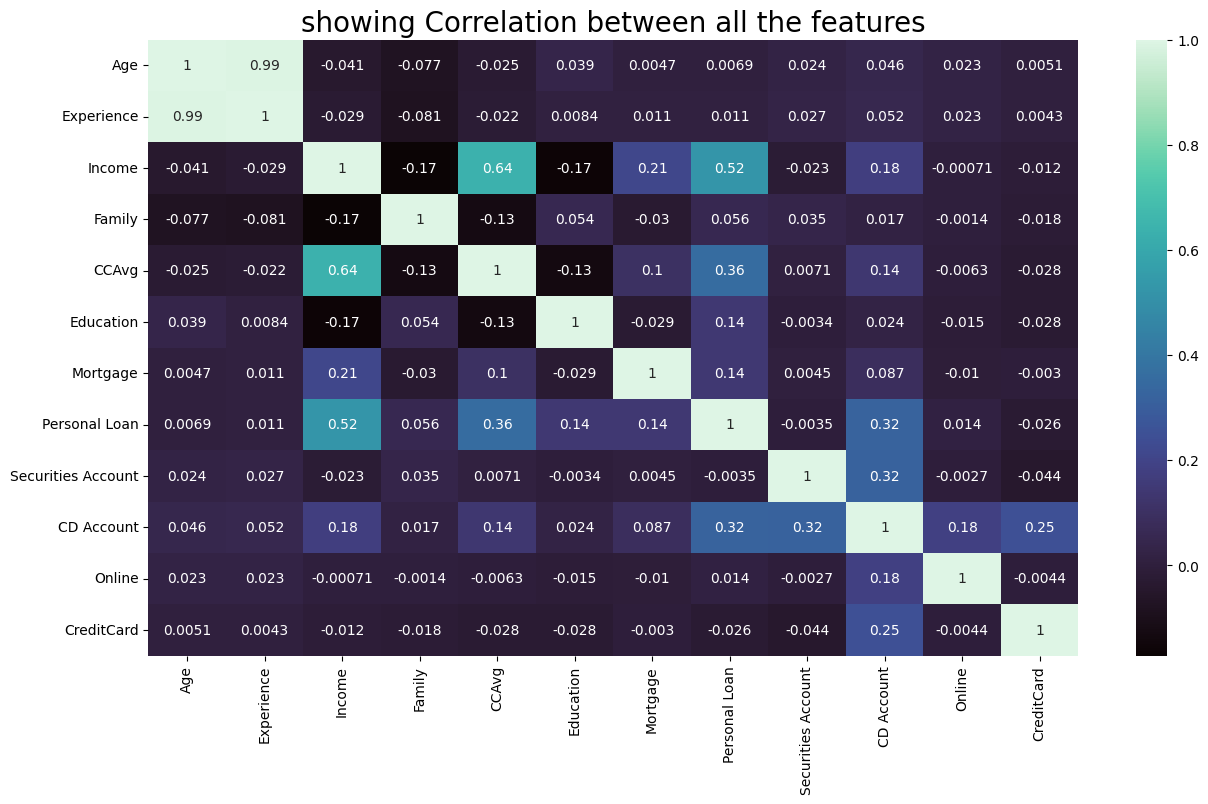

In [12]:
plt.figure(figsize=(15,8))
plt.title("showing Correlation between all the features",fontsize=20)
sns.heatmap(dff.corr(),annot=True,cmap='mako')

In [13]:
dff.shape

(1406, 12)

**Separating the class 0 and class 1 Credit Card**

In [14]:
class_0 = dff[dff.CreditCard==0]
class_0.shape

(1002, 12)

In [15]:
class_1 = dff[dff.CreditCard==1]
class_1.shape

(404, 12)

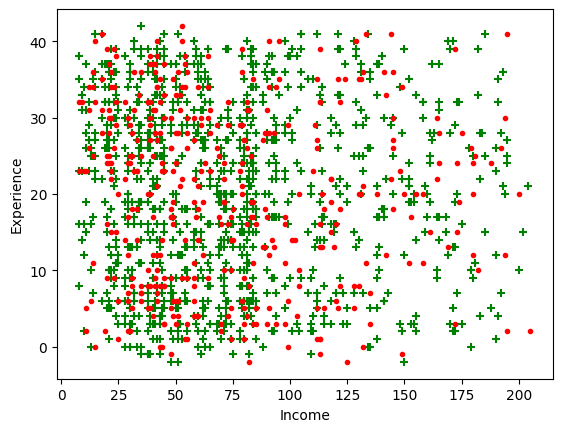

In [16]:
#Income vs Experience scatter Plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(class_0['Income'],class_0['Experience'], color = 'green', marker='+')
plt.scatter(class_1['Income'], class_1['Experience'], color = 'red', marker='.')

In [17]:
#scaling the data using Standard Scaler to remove the outliers.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(dff.drop('CreditCard',axis=1)).transform(dff.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=dff.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.743219,-1.634278,-0.549115,1.334660,-0.218589,-1.035393,-0.558089,-0.336485,2.872281,-0.253664,-1.230937
1,-0.017004,-0.083460,-0.877863,0.478187,-0.274340,-1.035393,-0.558089,-0.336485,2.872281,-0.253664,-1.230937
2,-0.534869,-0.428086,-1.381945,-1.234758,-0.553093,-1.035393,-0.558089,-0.336485,-0.348155,-0.253664,-1.230937
3,-0.880112,-0.945026,0.568631,-1.234758,0.394668,0.163752,-0.558089,-0.336485,-0.348155,-0.253664,-1.230937
4,-0.880112,-1.031182,-0.636781,1.334660,-0.553093,0.163752,-0.558089,-0.336485,-0.348155,-0.253664,-1.230937


In [18]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = dff['CreditCard']

**Implementation of SVM**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
#apply SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [21]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [22]:
print('Model accuracy :{0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy :0.732


<Axes: >

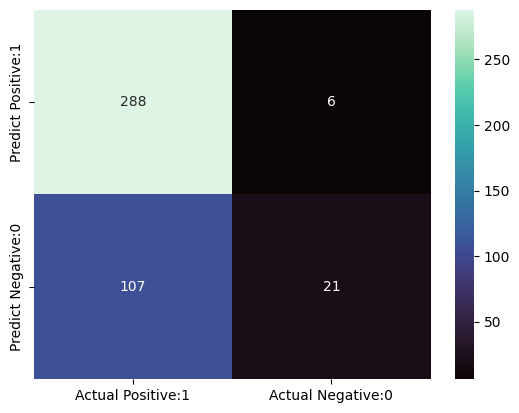

In [25]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [26]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       294
         1.0       0.78      0.16      0.27       128

    accuracy                           0.73       422
   macro avg       0.75      0.57      0.55       422
weighted avg       0.74      0.73      0.66       422



In [29]:
#applying SVM model Using Sigmoid Kernel Functions
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.652


In [31]:
#Applying SVM model using Linear Kernel Function
Linear_Classifier = SVC(kernel='linear').fit(x_train,y_train)
y_pred = Linear_Classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy with linear kernel : 0.730


In [32]:
#Apply SVM model using polynomial Kernel fucntion
Poly_svc = SVC(kernel = 'poly',C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy with rbf kernel : 0.725


In [33]:
#Apply SVM model using Guassian RBF Kernel Function
rbf_svc = SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model Accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model Accuracy with rbf kernel : 0.732


<Axes: >

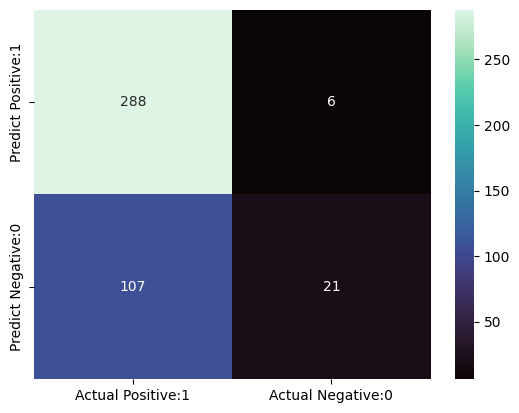

In [34]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [35]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       294
         1.0       0.78      0.16      0.27       128

    accuracy                           0.73       422
   macro avg       0.75      0.57      0.55       422
weighted avg       0.74      0.73      0.66       422

